<h1> Market Segmentation </h1>

<p>For the following dataset, please determine the best market segmentations for the data below - make sure to plot and explain your results when possible. The dataset is comprised of Satisfaction (discrete) and Loyalty (continuous). Please explain any considerations/assumptions you make as well as any conclusions you draw from the data. Think about these segmentations and think about what other kinds of data that might also lead to a more insightful analysis. Please include all things you tried - both what worked, and what didn't and why (very important).
Please upload your results to Github and email it back to us. Thank you.</p>



+ The idea of Market Segmentation is to breaking up people who use your product into discrete groups and then treat them regarding designing the new product accordingly. For instance, a chocolate company can have consumers in different categories, such as "conservative" chocolate lovers (customers who only like plane milk or dark chocolate but don't like any other new  textures or tastes), "adventurous" chocolate lovers (customers who love to try and experience different textures in a chocolate, say pretzel blended with chocolate or dried fruit in chocolates). When a company decides to launch a new product line or make any other changes to their products, it's to their benefit to have a good understanding about their customers so thay can predict if the launch is profitable for the company and decide accordingly. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import scipy.stats as stats
import sklearn
import scipy as sp

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols
#from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn import svm

+ In the next few cells, I am getting to know my data and check my data set

In [2]:
df = pd.read_csv(r'C:\Users\Nazanin\Downloads\market_data.csv', sep="\t")
df.head()

,"Satisfaction,Loyalty"
0,"4,-1.33"
1,"6,-0.28"
2,"5,-0.99"
3,"7,-0.29"
4,"4,1.06"


+ The Satisfaction,Loyalty column need to get separated as well as the comma needs to be removed. This will be done in the 
next few cells

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 1 columns):
Satisfaction,Loyalty    480 non-null object
dtypes: object(1)
memory usage: 3.8+ KB


In [4]:
df.isnull().sum()

Satisfaction,Loyalty    0
dtype: int64

In [5]:
#df.columns  # I am commenting on the cells that won't be needed to be displayed for a cleaner representation :) 

In [6]:
df.describe()

,"Satisfaction,Loyalty"
count,480
unique,30
top,"7,1.36"
freq,16


In [7]:
print(df.columns.dtype)

object


In [8]:
df['Satisfaction,Loyalty'].unique()

array(['4,-1.33', '6,-0.28', '5,-0.99', '7,-0.29', '4,1.06', '1,-1.66',
       '10,-0.97', '8,-0.32', '8,1.02', '8,0.68', '10,-0.34', '5,0.39',
       '5,-1.69', '2,0.67', '7,0.27', '9,1.36', '8,1.38', '7,1.36',
       '7,-0.34', '9,0.67', '10,1.18', '3,-1.69', '4,1.04', '3,-0.96',
       '6,1.03', '9,-0.99', '10,0.37', '9,0.03', '3,-1.36', '5,0.73'],
      dtype=object)

In [9]:
type(df.columns)

pandas.core.indexes.base.Index

In [10]:
#df.dtypes

In [11]:
df[['Satisfaction','Loyalty']] = df['Satisfaction,Loyalty'].apply(lambda x: pd.Series(str(x).split(",")))

In [12]:
df = df[['Satisfaction','Loyalty']]

In [15]:
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


+ The above data set is now ready for the next data cleaning up procedures

In [14]:
df.columns

Index(['Satisfaction', 'Loyalty'], dtype='object')

In [16]:
df.describe()

,Satisfaction,Loyalty
count,480,480
unique,10,25
top,10,1.36
freq,64,32


In [17]:
#print(df.columns.dtype)

In [18]:
#type(df.columns)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
Satisfaction    480 non-null object
Loyalty         480 non-null object
dtypes: object(2)
memory usage: 7.6+ KB


+ Let's switch the data type of the columns from object to float (I could change the Satisfaction to integer as well)

In [20]:
df.Satisfaction.astype('float').head()

0    4.0
1    6.0
2    5.0
3    7.0
4    4.0
Name: Satisfaction, dtype: float64

In [21]:
#df.Satisfaction.describe() 

In [22]:
#type(df['Satisfaction'])

In [23]:
df['Satisfaction'] = df.Satisfaction.astype('float')

In [24]:
df.Satisfaction.describe()  

count    480.000000
mean       6.400000
std        2.579508
min        1.000000
25%        4.000000
50%        7.000000
75%        9.000000
max       10.000000
Name: Satisfaction, dtype: float64

In [25]:
df.Loyalty.astype('float').head()

0   -1.33
1   -0.28
2   -0.99
3   -0.29
4    1.06
Name: Loyalty, dtype: float64

In [26]:
df['Loyalty'] = df.Loyalty.astype('float')

In [27]:
df.Loyalty.describe()

count    480.000000
mean       0.001000
std        1.000434
min       -1.690000
25%       -0.970000
50%        0.150000
75%        1.020000
max        1.380000
Name: Loyalty, dtype: float64

+ After fixing the data types and splitting the columns and other house keepings, let's see how the data looks like.

### data visualization

+ Plotting a scatter plot is always a good idea since it gives a good visualization on a 2D plane on how the data is scattered. Since we only have 2 columns here, only one scatter plot can be done. Moreover, since there are only 30 unique data points in our data set, there is a substantial level of overlap on the scatter plot. Therefore, we are going to plot the data points on a 2D plane with various plots, including swarmplot, jitter, etc. 

+ It is worth noting that the swarmplot is only good for one axis being categorical variable but we will plot it here for the record.

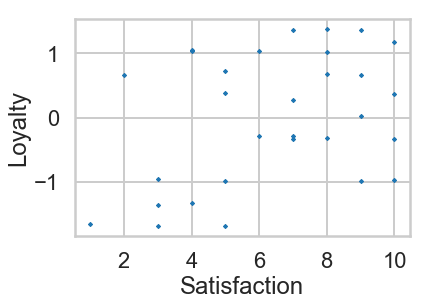

In [28]:
plt.scatter(df.Satisfaction, df.Loyalty, s=2)
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

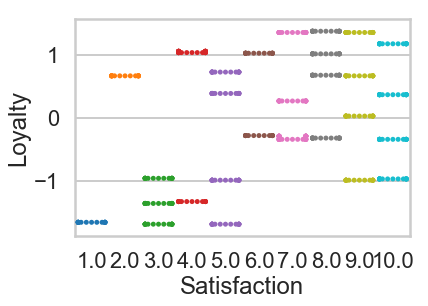

In [31]:
sns.swarmplot(x = 'Satisfaction', y='Loyalty' , data = df)
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()             

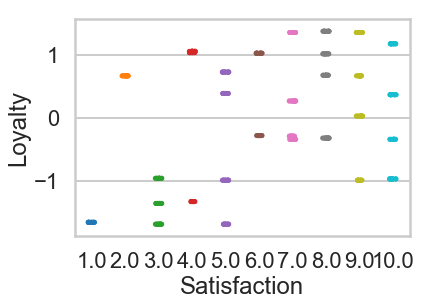

In [33]:
ax = sns.stripplot(x="Satisfaction", y="Loyalty", data=df, jitter=True)


After getting a bit more familiar with the content of the data, let us continue with data visualization and draw bar charts and histograms: 
+ Bar chart of Satisfaction (Barplots are graphs that visually display counts of categorical variables)

+ Histogram of Loyalty

In [49]:
table = pd.crosstab(index=df["Satisfaction"], columns="count")
table

col_0,count
Satisfaction,
1.0,16
2.0,16
3.0,48
4.0,48
5.0,64
6.0,32
7.0,64
8.0,64
9.0,64


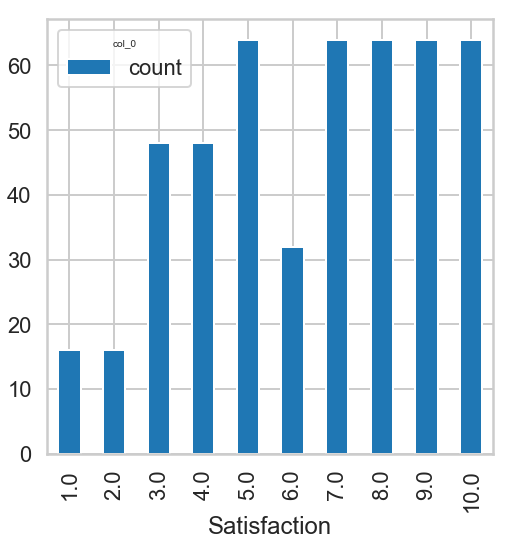

In [51]:
table.plot(kind="bar", figsize=(8,8))

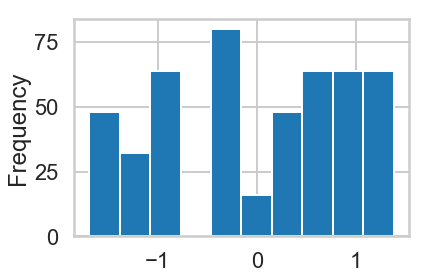

In [52]:
df['Loyalty'].plot(kind = 'hist')

Now that we plotted various different aspects of the data set (scatter plot to see how they are related), bar plot of a categorical variable to see the number of counts in different categories and histogram of the loyalty, let's start with fitting a linear model (predicting loyalty with satisfaction), which is highly unlikely to be fitted in a linear model, but let's give it a go and see how we can imporve the linear fit using other techniques. 

              Satisfaction   Loyalty
Satisfaction      1.000000  0.366929
Loyalty           0.366929  1.000000


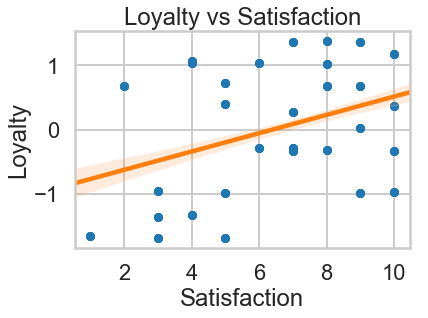

In [55]:
# Linear Regression (just to check) 
# Calculate Peason's R for each feature:
correlation = df.corr()
sns.regplot(x='Satisfaction', y='Loyalty', data=df, fit_reg = True, scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.title('Loyalty vs Satisfaction');
print(correlation)


In [56]:
m = ols('Loyalty ~ Satisfaction',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                Loyalty   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     74.37
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           9.60e-17
Time:                        23:45:11   Log-Likelihood:                -646.09
No. Observations:                 480   AIC:                             1296.
Df Residuals:                     478   BIC:                             1305.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9098      0.114     -7.991   

+ The above summary table of Ordinary Least Squares shows that the linear fit is not a suitable one for this data set.
+ Having one feature in the data set, obviously would not be a good candidate for a linear model but at least we checked! 

+ Thinking back to the data set we are given, in order to segment the market, we need a way to compare them. To do this we're going to use K-Means clustering (as this method is mainly used for market segmentation). K-means is a way of taking a dataset and finding groups (or clusters) of points that have similar properties. The grouping is such that the distance between all the points and the midpoint of the cluster they belong to is minimized. 
+ Since we're trying to learn more about the market behavier, we can use their behavior (Loyalty) as a way to group similar minded groups together. We can then study those groups to look for patterns and trends which can help us formulate future behavier. The only thing is that we are given only Satisfaction and Loyalty so there is not so much to play with and dissect but let's see what we can get with what we are given! 

+ K-means method is an unsupervised ML algorithm. I will now vary the number of my clusters and see the outcomes. Sometimes the number of clusters chosen have a minimum, meaning that a certain number of clusters gives a bad result compared to one below and one above it so in the following, we start with 2 and then go to 3 to comapre but if n = 2 gives us a better statistcs, we won't stop and we go to n = 4 to see how 4 clusters predict. 

+ For this data set, it really doesn't make sense to go any number of clusters above 4 (this is mainly by intuition and educated guess)

In [69]:
cluster = KMeans(n_clusters=2)   
# slice matrix so we only include the 0/1 indicator columns in the clustering
df['cluster'] = cluster.fit_predict(df[['Satisfaction', 'Loyalty']])
df.cluster.value_counts()

0    272
1    208
Name: cluster, dtype: int64

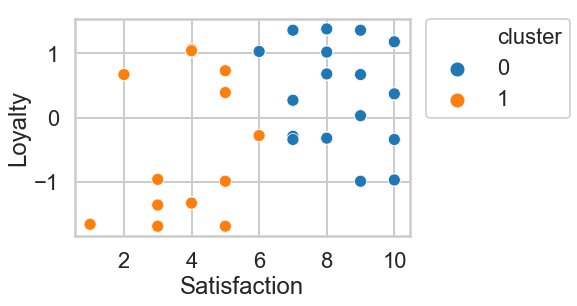

In [70]:
sns.scatterplot(x ='Satisfaction', y= 'Loyalty', data = df , hue = 'cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #there is a good separate here 

In [71]:
silhouette_score(df[['Satisfaction', 'Loyalty']], df.cluster)  

0.561428322420888

In [62]:
cluster = KMeans(n_clusters=3)   #unsupervised 
# slice matrix so we only include the 0/1 indicator columns in the clustering
df['cluster'] = cluster.fit_predict(df[['Satisfaction', 'Loyalty']])
df.cluster.value_counts()

1    192
0    192
2     96
Name: cluster, dtype: int64

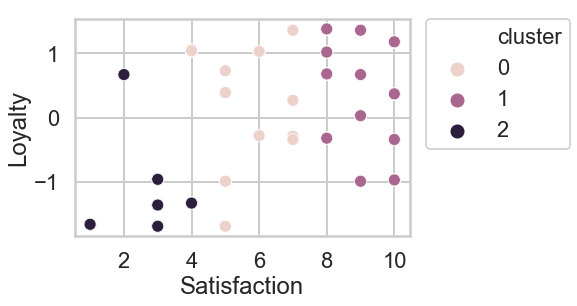

In [63]:
sns.scatterplot(x ='Satisfaction', y= 'Loyalty', data = df , hue = 'cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

In [64]:
silhouette_score(df[['Satisfaction', 'Loyalty']], df.cluster) 

0.473078055293308

In [65]:
cluster = KMeans(n_clusters=4)    
# slice matrix so we only include the 0/1 indicator columns in the clustering
df['cluster'] = cluster.fit_predict(df[['Satisfaction', 'Loyalty']])
df.cluster.value_counts()

3    144
1    128
0    112
2     96
Name: cluster, dtype: int64

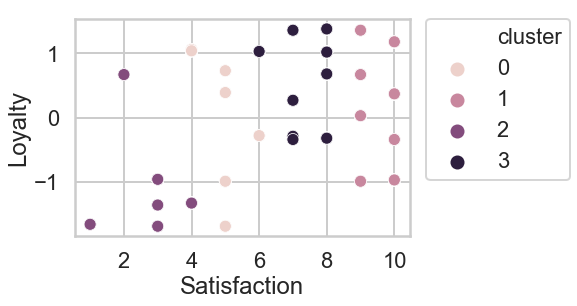

In [66]:
sns.scatterplot(x ='Satisfaction', y= 'Loyalty', data = df , hue = 'cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

In [67]:
silhouette_score(df[['Satisfaction', 'Loyalty']], df.cluster) 

0.449295674322253

+ As we saw, the cluster number n = 2 gave us the best value and the score of 0.56 is actually pretty good! Which means that there is a good separate here with n = 2, going to n = 3 and n = 4 only made it worse. 

+ Having score of 0.56 for n = 2, K-means model clustering quality is good based on this metric. 

+ We are going to perform a PCA (Principal Component Analysis) on this data, although knowing ahead of time due to the fact that we only have one feature, the PCA would not be a practical thing to do since we really don't even need to reduce dimensionality. 

+ Reason for PCA not to be applicable here is that it is used to transform  multi-dimensional dataset into a 2 dimensional dataset while our data set is already having only one feature. The only reason we (I) are (am) doing this is to show this is what I would have done in case I was given a data set with more dimensions :) 

In [72]:
pca = PCA(n_components=2)  
df['x'] = pca.fit_transform(df[['Satisfaction' , 'Loyalty']])[:,0]
df['y'] = pca.fit_transform(df[['Satisfaction' , 'Loyalty']])[:,1]
df.head()

,Satisfaction,Loyalty,cluster,x,y
0,4.0,-1.33,1,2.582913,0.927428
1,6.0,-0.28,1,0.440007,0.212967
2,5.0,-0.99,1,1.541231,0.752786
3,7.0,-0.29,0,-0.545350,0.383763
4,4.0,1.06,1,2.198298,-1.431422


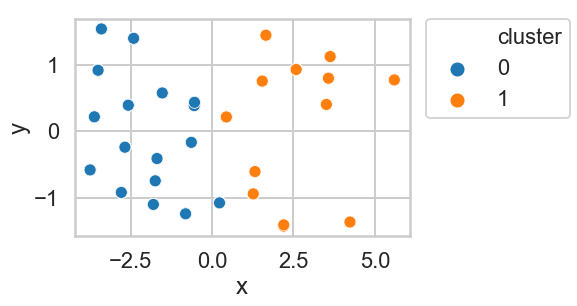

In [74]:
sns.scatterplot(x ='x', y= 'y', data = df , hue = 'cluster')  
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
# I should not even plot this but basically this is the plot of my "reduced" data set 
# dimensions that the PCA method gave me. 

In [64]:
# I really have to drop this cell but since the questions says include what works and what doesn't, I will keep it. 
# As discussed earlier, linear regression won't work on this data set. The statistics is shown earlier. 
X = df.drop('Loyalty', axis = 1)
# This creates a LinearRegression object
lm = LinearRegression()
lm
lm.fit(X, df.Loyalty)
print(lm.coef_)
print(lm.intercept_)

[-1.45993113e-16  7.38891687e-16 -1.60926764e-01 -9.86966350e-01]
0.0010000000000005393


In [75]:
#print(lm.score(X, df.Loyalty))   # r^2

In [52]:
#SVM Linear Regression 
from sklearn import svm

In [53]:
X = df[['Satisfaction']]
y = df.Loyalty
clf = svm.SVR()
clf.fit(X, y) 


C:\Users\Nazanin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
print(clf.score(X, df.Loyalty)) #this is the R^2 score which is pretty bad 

0.269126880772005
